In [3]:
try:
    import json
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import norm, poisson
    from tqdm.notebook import tqdm
except:
    !pip install tqdm numpy matplotlib scipy
    import json
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import norm, poisson
    from tqdm.notebook import tqdm

params = json.load(open('params.json'))

reversed_region2code = params['reversed_region2code']
region2code = params['region2code'] 
all_year = params['all_year']
all_region_code = params['all_region_code'] 
house_price_mean_preds = params['house_price_mean_preds'] 
house_price_std_preds = params['house_price_std_preds'] 
fire_preds = params['fire_preds'] 
p = params['p']
CPI_prediction = params['CPI_prediction'] 

all_region_name = [reversed_region2code[r] for r in all_region_code]

# You can select the area you need by commenting or uncommenting

In [4]:
all_region_name = [
    'East Midlands',
    'East of England',
    'London',
    'North East',
    'North West',
    'South East',
    'South West',
    'West Midlands',
    'Yorkshire and The Humber'
]

  0%|          | 0/9 [00:00<?, ?it/s]

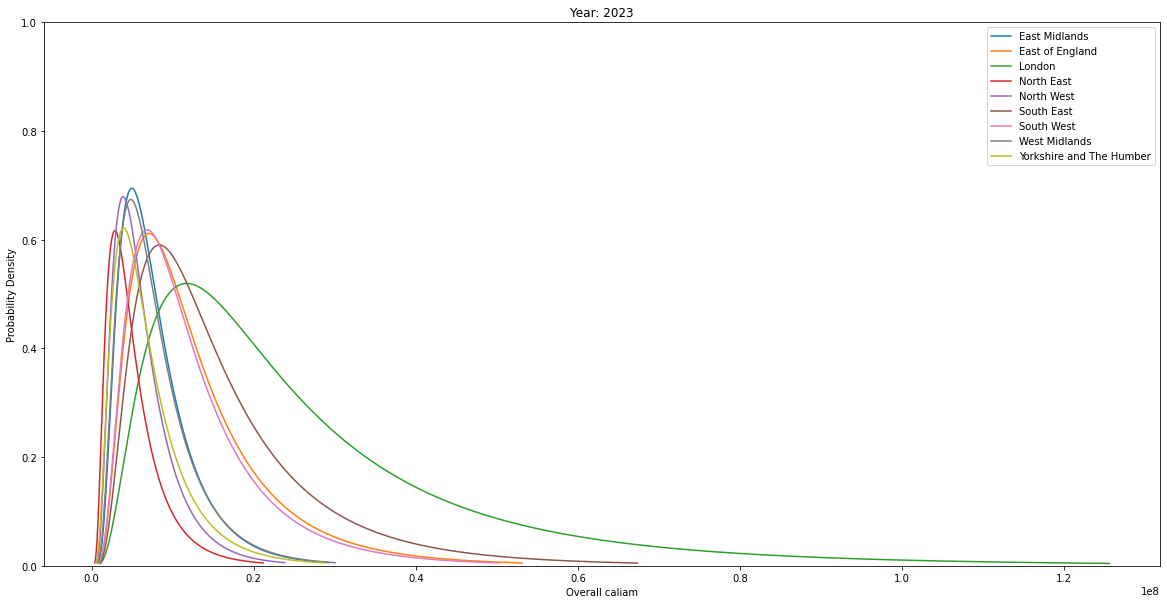

In [5]:
def calculate_S_pdf(norm_dist, poisson_dist, offset_cliam=0, offset_fire_times=0, n_bins=1000):

    max_n = int(poisson_dist.ppf(0.999))  
    N_values = np.arange(0-offset_fire_times, max_n-offset_fire_times)  
    X_values = np.linspace(norm_dist.ppf(0.001)-offset_cliam, norm_dist.ppf(0.999)-offset_cliam, n_bins)  
    N_probs = poisson_dist.pmf(N_values+offset_fire_times)  
    X_probs = norm_dist.pdf(X_values+offset_cliam) 
    S_probs = np.outer(N_probs, X_probs)  

    S_pdf = np.sum(S_probs, axis=0)

    return X_values, S_pdf

fig = plt.figure(figsize=(20, 10))

legend = []

for r_name in tqdm(all_region_name):
    r = region2code[r_name]
    years = []
    ninty = []
    norm_dist = norm(house_price_mean_preds[r_name], house_price_std_preds[r_name])
    poisson_dist = poisson(fire_preds[r_name])
    n_bins=1000
    X_values, S_pdf = calculate_S_pdf(norm_dist, poisson_dist, float(np.log(p * (CPI_prediction/100))), n_bins=n_bins )


    plt.plot(np.exp(X_values), S_pdf, label=r_name)
    legend.append(r_name)
    
plt.title(f'Year: 2023')
plt.legend()
plt.xlabel('Overall caliam')
plt.ylabel('Probability Density')
plt.ylim(0, 1)
# plt.savefig(f'pred.jpg', dpi=300)
plt.show()